# Aim
Plot dissection time-memory tradeoffs

In [1]:
import sys
sys.path.insert(1, '../')
load("../Wave_param.py")

from dissection import dissection

import numpy as np
import math
import matplotlib.pyplot as plt


## An example of dissection

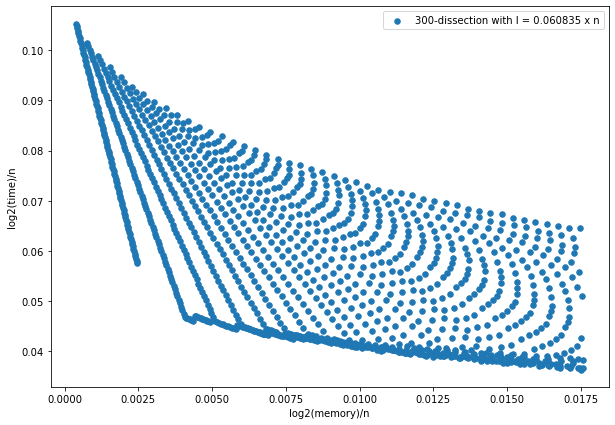

In [13]:
plt.figure(figsize = (10,7))

r = 300
Re = 0.060835

M,T, colors = dissection(r, R, Re,W, nbMem=100)
plt.scatter(M,T, s=30, marker = 'o', label = str(r)+"-dissection with l = " + str(round(Re,6)) + " x n")
plt.xlabel("log2(memory)/n")
plt.ylabel("log2(time)/n")
plt.legend()



Now, we can display the different regimes of dissections

* A red point corresponds to dissection without tweaks
* A black point corresponds to a dissection with reduced granularity 
* A colored point corresponds to a modification of the dissection cutting points

Text(0, 0.5, 'log2(time)/n')

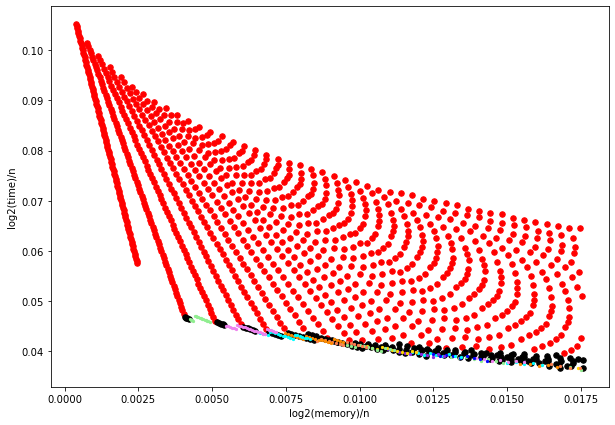

In [14]:
plt.figure(figsize = (10,7))

r = 300
Re = 0.060835

M,T, colors = dissection(r, R, Re,W, nbMem=100)
for i in range(0,len(M)):
    if colors[i] == "black" or colors[i] == "red":
        plt.scatter(M[i],T[i], s=30, marker = 'o',c=colors[i])
    else:
        plt.scatter(M[i],T[i], s=5, marker = 'o',c=colors[i])
        
plt.xlabel("log2(memory)/n")
plt.ylabel("log2(time)/n")

## Find the best tradeoffs

We can play on the number of lists considered within the dissection (denoted by $r$). However, here $r$ is large enough, so that increasing the latter would give more trade-offs in the zone where memory is neglectable in front of the time. So this is not what we want.

However, we can play on the $l$ parameter (i.e size of the sub-syndrome). Here we aim at finding the best range of $l$ parameters ($l = n \times Re$ by definition). 

### 1. Take all possible coefficients

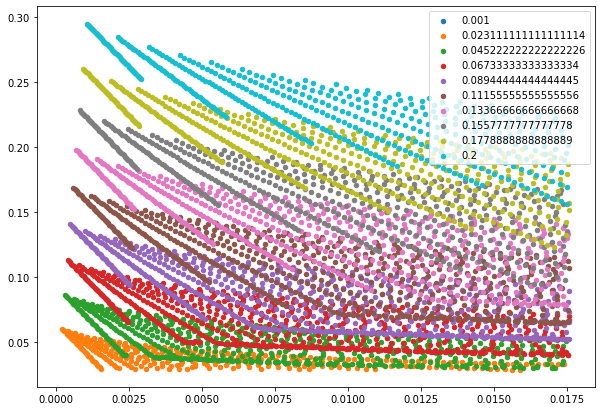

In [6]:
precision = 50 

plt.figure(figsize = (10,7))

Res = np.linspace(0.001, 0.2, 10)
for Re in Res:
    (M,T,_) = dissection(r, R, Re,W, nbMem=precision)
    plt.scatter(M,T, label=Re, s = 20)
        
plt.legend()

### 2 .refinements

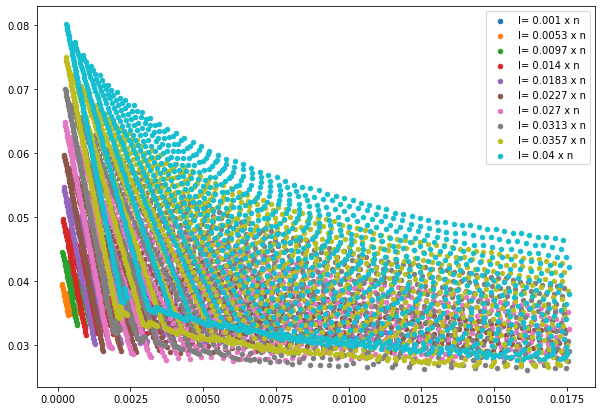

In [12]:
precision = 150

plt.figure(figsize = (10,7))

Res = np.linspace(0.001, 0.04, 10)
for Re in Res:
    (M,T,_) = dissection(r, R, Re,W, nbMem=precision)
    plt.scatter(M,T, label = "l= " + str(round(Re,4)) + " x n", s = 20)
        
plt.legend()